# Exploratory Data Analysis using Python: A Case Study

 ## CONTENT:
* Selecting and downloading a dataset
* Data preparation and cleaning
* Exploratory analysis and visualization
* Asking and answering interesting questions
* Summarizing inferences and drawing conclusions

## About:
Analyzing responses from the Stack Overflow Annual Developer Survey 2020.
![](https://i.imgur.com/qXhHKqv.png)

## Introduction:
In this tutorial, we'll analyze the Stack Overflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data and official analysis [Here](https://insights.stackoverflow.com/survey).  

There are several options for getting the dataset into Jupyter.  

* Download the CSV manually and upload it via Jupyter's GUI
* Use the `urlretrieve` function from the `urllib.requsest` to download CSV files from a raw URL
* Use a helper library, e.g., `opendatasets`, which contains a collection of curated datasets and provides a helper function for direct download.  

We will use the `opendatasets` helper library to download the files.

In [1]:
# Let's install the opendatasets library
!pip install opendatasets

In [2]:
# importing the opendatasets library to use
import opendatasets as ods

In [3]:
# Download the CSV file
ods.download('stackoverflow-developer-survey-2020')

94609408it [04:28, 352058.52it/s]                                                                                      


16384it [00:01, 15691.38it/s]                                                                                          


8192it [00:00, 8307.61it/s]                                                                                            


* **Let's verify the data set was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.**

In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

**You can through the downloaded files using the 'File' > 'Open' menu option in Jupyter. It seems like the dataset contains three files:**  
* `README.txt`:- Information about the dataset
* `survey_result_public.csv`:- The list of questions, and shortcodes for each question  
* `survey_result_schema.csv`:- The full list of responses to the questions  

Let's load the CSV file using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [6]:
import pandas as pd

In [7]:
survey_raw_df=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


* **The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been analyzed to remove personally identifiable, information, and each respondent has been assigned a randomized respondent ID.**    
  
  
* **Let's view the list of columns in the data frame:**


In [9]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
# Calculating total number of columns
len(survey_raw_df.columns)

61

* **It appears that short codes for questions have been used as column names.**  

* **We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the `QuestionText` as the value.**

In [11]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [12]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

* **We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.**

In [13]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

* **We have now loaded the dataset. We are ready to move to the next step of preprocessing & cleaning the data for our analysis.**

## Data Preparation & Cleaning:
While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experiences, and preferences
* Employment-related information, preferences, and opinions  

Let's select a subset of columns with relevant data for our analysis:

In [14]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [15]:
len(selected_columns)

20

* **Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.**

In [16]:
survey_df = survey_raw_df[selected_columns].copy()

In [17]:
schema = schema_raw[selected_columns]

* **Let's view some basic information about the data frame.**

In [18]:
survey_df.shape

(64461, 20)

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

* **Most columns have the data type `object`, either because they contain values of different types or contain empty values `(NaN)`. It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (i.e.,64461). We'll need to deal with empty values and manually adjust the data types for each column on a case-by-case basis.**  


* **Only two of the columns were detected as numeric columns *(i.e., Age and WorkWeekHrs)*, even through a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric values. The non-numeric are converted to `NaN`.** 

In [20]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

* **Let's now view some basic statistics about numeric columns.**

In [21]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


* **There  seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses my contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [See Here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).**

In [22]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

* **The same holds for `WorkWeekHrs`. Let's ignore entries where th value for the column is higher than 140 hours. (~20 Hrs per day).**

In [23]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

* **The gender column also allows for picking multiple operations. We'll remove values containing more than one option to simplify our analysis.**

In [24]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [25]:
import numpy as np

In [26]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

* **We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.**

In [27]:
survey_df.sample(15)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
14317,India,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,17.0,14.0,6.0,C;C++;Python,C;C++;Python;Rust,Once a decade,Go for a walk or other physical activity;Do ot...,Employed full-time,"Academic researcher;Developer, mobile",50.0,Slightly dissatisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Critically important
57149,Spain,23.0,Man,I never completed any formal education,NaN,Yes,12.0,NaN,NaN,C#;C++;Dart;HTML/CSS;JavaScript;PHP;Python,C#;Java;Python,Once a year,Meditate;Play games;Visit Stack Overflow;Panic...,Student,NaN,NaN,NaN,Diversity of the company or organization;Flex ...,NaN,NaN
51681,Spain,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,23.0,2.0,1.0,C++;Go;JavaScript;PHP;Rust,C++;Go;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",45.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
23233,China,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,No,19.0,3.0,NaN,C#;Go;Rust;TypeScript,C#;Rust;TypeScript,Every few months,Play games;Visit Stack Overflow,"Not employed, but looking for work","Developer, full-stack",NaN,NaN,Remote work options,NaN,Fairly important
40024,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,7.0,3.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",50.0,Slightly satisfied,NaN,Often: 1-2 days per week or more,Fairly important
25833,Egypt,21.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,18.0,4.0,NaN,C;Go;HTML/CSS;Python;Rust,Bash/Shell/PowerShell;C;Go;Haskell;Perl;Rust;T...,Every few months,Play games;Visit Stack Overflow;Panic;Watch he...,Student,NaN,NaN,NaN,Office environment or company culture;Opportun...,NaN,NaN
13443,India,31.0,Man,NaN,"Computer science, computer engineering, or sof...",No,18.0,6.0,3.0,C++;HTML/CSS;Java,HTML/CSS;Java;JavaScript;Julia;Python;Ruby;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, QA or test",40.0,Neither satisfied nor dissatisfied,Financial performance or funding status of the...,Never,Very important
2271,Brazil,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",No,12.0,11.0,6.0,Bash/Shell/PowerShell;C;Python;Ruby,Bash/Shell/PowerShell;C;C++;Python;Ruby,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, embedded applic...",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
2594,Pakistan,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,9.0,2.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby...,C++;Go;JavaScript;Python;Ruby;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",40.0,Slightly dissatisfied,Office environment or company culture;Opportun...,Sometimes: 1-2 days per month but less than we...,Fairly important
35102,United States,42.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",Yes,8.0,30.0,20.0,Python,Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist,40.0,Very satisfied,Remote w

* **Let's save and commit our work before continuing.**

## Exploratory Analysis and Visualization:
Before we ask questions about the survey the survey responses, it would help to understand the respondents' demographics,  i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tend to have some selection bias: [See Here](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#F0F8FF'

## Country:
Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [29]:
schema.Country

'Where do you live?'

In [30]:
survey_df.Country.nunique()

183

* **We can  identify the countries with the highest number of respondents using the `value_counts` method.**

In [31]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

* **We can visualize this information using a bar chart.**

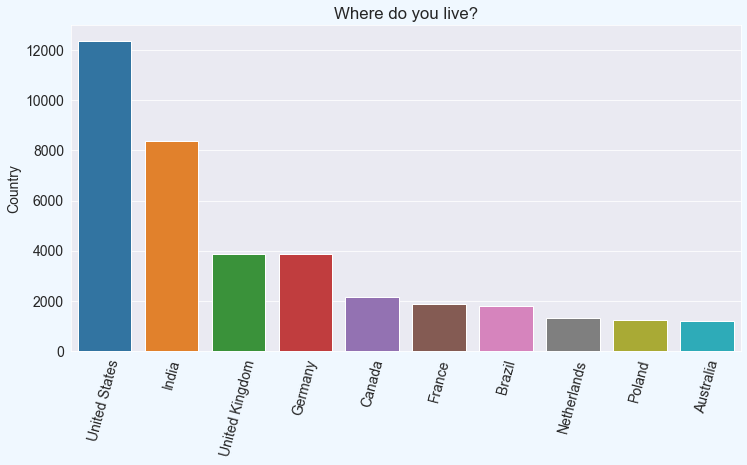

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

* **It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in the English, and these counties have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community-especially from non-English speaking counties. Programmers from non-English speaking counties are almost certainly underrepresented.**  

**Exercise:-** Try finding the percentage of the responses from English-speaking vs non English-speaking counties. You can use this list of languages spoken in different countries: [Click Here](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv)

## Age:
The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it.

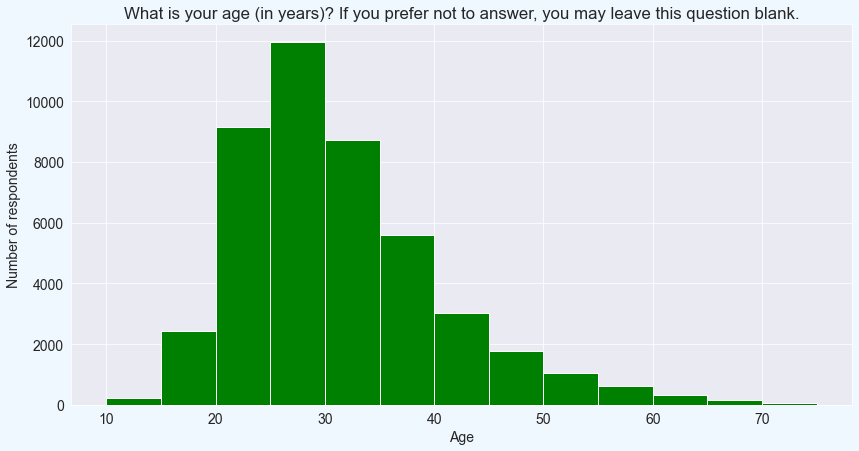

In [33]:
plt.figure(figsize=(14,7))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='green');

* **It appears that a large percentage of respondents are 20-45 years old. It's some what representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.**  

**Exercise:-** You may want to filter out responses by age (or age group) if you'd like to analyze and compare the survey results for different age groups. Create a new column called AgeGroup containing values like `Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years`and `Older than 60 years`. then, repeat the analysis in the rest of the notebook for each age group.

## Gender:
Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the the programming community, so we might expect to see a skewed distribution here.

In [34]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [35]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

* **A pie chart would be a grate way to visualize the distribution.**

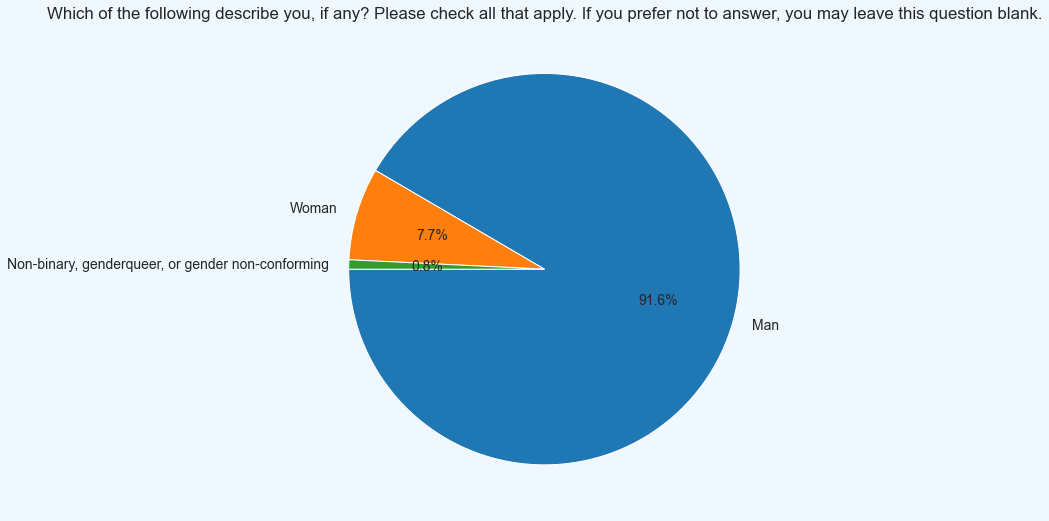

In [36]:
plt.figure(figsize= (18,9))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct = '%1.1f%%', startangle=180);

* **Conclusion:-** Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community- which is estimated to be around 12%.

**Exercise:-** It would be interested to compare the survey responses and preferences across genders. Repeat this analysis with these breakdowns. How do the relative education levels differ across genders? How do the salaries vary? you may find this analysis on the Gender Divide in Data Science: [Click Here](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b).

## Education Level:
Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

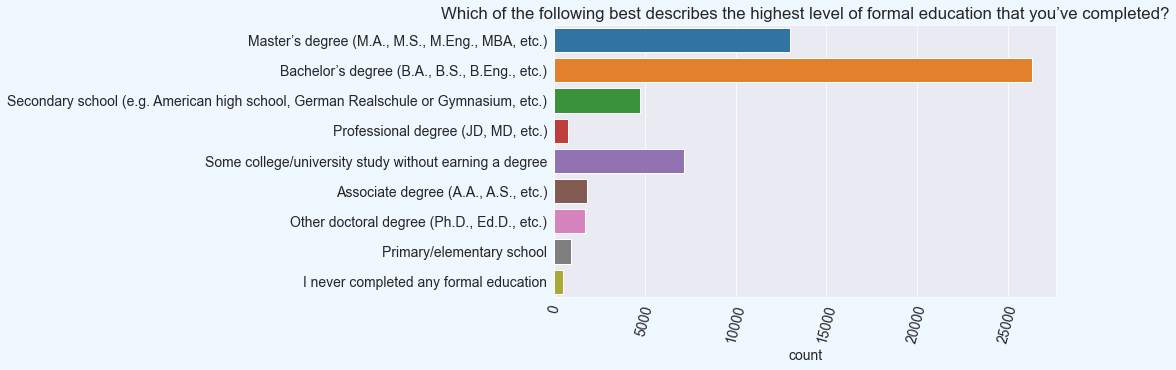

In [37]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

* **Conclusion:-** It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education.  
    However, it's not clear from this graph alone if they hold a degree in computer science.  
    
**Exercise:-** The graph currently show the number of respondents for each option. Can you modify it to show the percentage instead? Further, try  comparing the percentage for each degree for men vs women.  

* **Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.**

In [38]:
schema.UndergradMajor

'What was your primary field of study?'

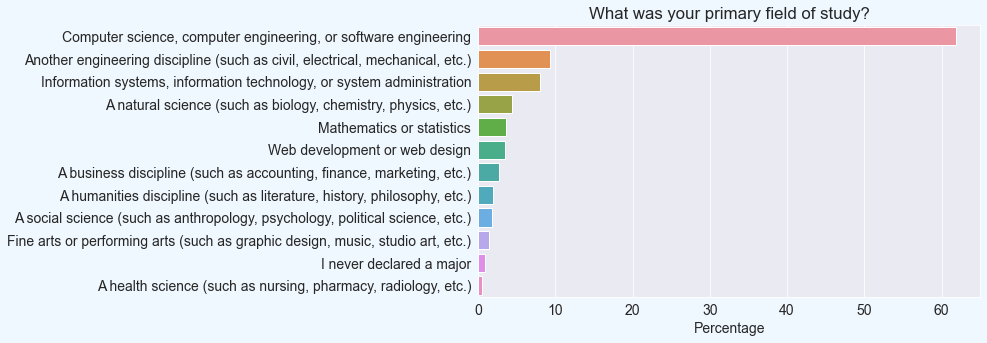

In [39]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

* **Conclusion:-** It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue pursue a major in computer science to become a successful programmer.  

**Exercise:-** Analyze the `NEWEdImp` column for respondents who hold some college degree vs those who don't. Do you notice any difference in opinion?  

## Employment:
Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [40]:
schema.Employment

'Which of the following best describes your current employment status?'

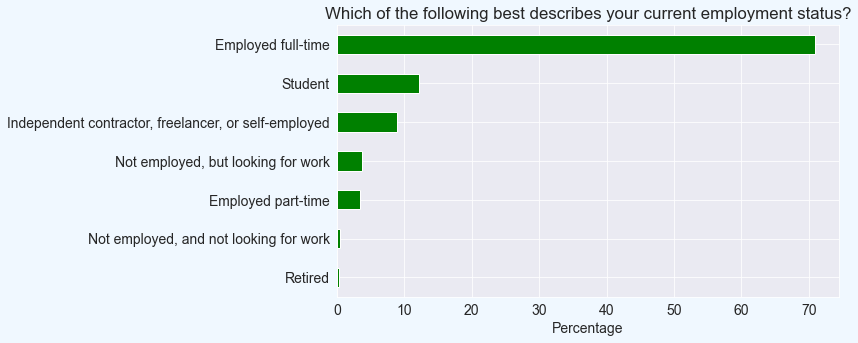

In [41]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

* **Conclusion:-** It appears that close to 10% of respondents are employed part time or as freelancers.  

**Exercise:-** Add a new column `EmploymentType` containing the values `Enthusiast` (student or not employed but looking for work), `Professional` (employed full-time, part-time or freelancing), and `Other` (not employed or retired). For each of the graph that follow, show a comparison between `Enthusiast` and `Professional`.  

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `(;)`, making it a bit harder to analyze directly.

In [42]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [43]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

* **Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.**

In [44]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
                # Mark the value in the option column as True
                result_df.at[idx, option] = True
    return result_df[options]

In [45]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [46]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* **The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.**  


* **We can now use the column-wise totals to identify the most common roles.** 

In [47]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)

In [48]:
dev_type_totals

Developer, desktop or enterprise applications    1
Educator                                         1
Engineer, site reliability                       1
Senior executive/VP                              1
Scientist                                        1
Data scientist or machine learning specialist    1
Academic researcher                              1
Data or business analyst                         1
Product manager                                  1
Engineering manager                              1
System administrator                             1
Engineer, data                                   1
Developer, full-stack                            1
Developer, embedded applications or devices      1
Database administrator                           1
Developer, game or graphics                      1
DevOps specialist                                1
Developer, QA or test                            1
Developer, back-end                              1
Developer, front-end           

* **As one might expect, the most common roles include "Developer" in the name.**

**Exercises:**
* Can you figure out what percentage of respondents work in roles related to data science?
* Which positions have the highest percentage f women?

 * **We've only explored a handful of columns from the 20 columns that we selected. Explore and visualize he remaining columns using the empty cells below.**

## Asking and Answering Questions:
We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations. 

**Question:- What are the most popular programming languages in 2020?**

**Answer:-** TO answer, this we can use the `LanguageWorkedWith` column. Similarly to `DevType`, respondents were allowed to choose multiple options here.

In [49]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

* **First, we'll split this column into a data frame containing a column of each language listed in the options.**

In [50]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [51]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* **It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.**

In [52]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

C#                       0.001555
Kotlin                   0.001555
Julia                    0.001555
Dart                     0.001555
Rust                     0.001555
Haskell                  0.001555
Go                       0.001555
C++                      0.001555
Scala                    0.001555
Perl                     0.001555
VBA                      0.001555
R                        0.001555
Bash/Shell/PowerShell    0.001555
HTML/CSS                 0.001555
TypeScript               0.001555
C                        0.001555
PHP                      0.001555
Java                     0.001555
SQL                      0.001555
Ruby                     0.001555
Python                   0.001555
Objective-C              0.001555
Swift                    0.001555
JavaScript               0.001555
Assembly                 0.001555
dtype: float64

* **We can plot this information using a horizontal bar chart.**

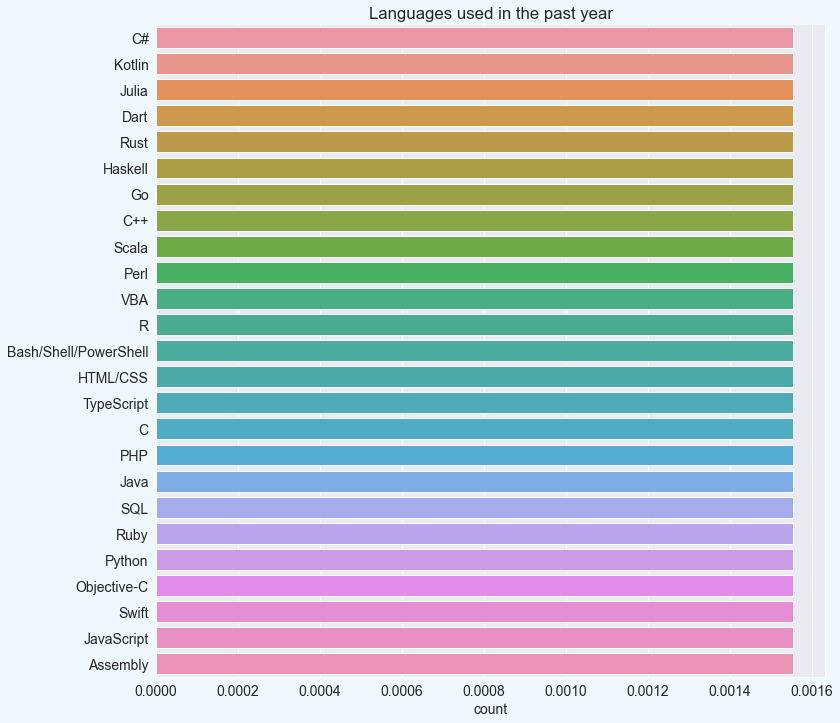

In [53]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title('Languages used in the past year');
plt.xlabel('count');

**Conclusion:-** Perhaps unsurprisingly, Javascript and HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational database, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for the other forms of development, beating out Java, which was the industry standard for sever and application development for over two decades.

**Exercises:**

* What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
* What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?
* What are the most common languages among respondents who work in fields related to data science?
* What are the most common languages used by developers older than 35 years of age?
* What are the most common languages used by developers in your home countery?

**Question:- Which language are the most people interested to learn over the next year?**  

**Answer:-** For this, we can use the `LanguageDesireNextYear` column with similar processing as the previous one.

In [54]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False)* 100
languages_interested_percentages

C#                       0.001555
Go                       0.001555
Dart                     0.001555
Kotlin                   0.001555
Julia                    0.001555
C++                      0.001555
Perl                     0.001555
Haskell                  0.001555
C                        0.001555
Bash/Shell/PowerShell    0.001555
Assembly                 0.001555
TypeScript               0.001555
SQL                      0.001555
HTML/CSS                 0.001555
R                        0.001555
Rust                     0.001555
PHP                      0.001555
Scala                    0.001555
Ruby                     0.001555
Java                     0.001555
Objective-C              0.001555
Swift                    0.001555
Python                   0.001555
JavaScript               0.001555
VBA                      0.001555
dtype: float64